## Data preprocessing 

In [414]:
import pandas as pd
import numpy as np  
from sklearn.preprocessing import OneHotEncoder    # من اجل تحويل الفئات الى ارقام One Hot method
from sklearn.preprocessing import LabelEncoder     # تحويل الفئات الى ارقام باستخدام ال Label
import matplotlib.pyplot as plt 
import seaborn as sns 
# import 

In [415]:
df=pd.read_csv('HR-Employee-Attrition2.csv')

In [416]:
df.head()

,Age,Gender,MaritalStatus,Department,JobRole,JobLevel,JobInvolvement,JobSatisfaction,MonthlyIncome,HourlyRate,...,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TrainingTimesLastYear,EmployeeCount,EmployeeNumber,Over18,StandardHours,Attrition
0,41,Female,Single,Sales,Sales Executive,2,3,4,5993,94,...,Yes,11,3,0,0,1,1,Y,80,Yes
1,49,Male,Married,Research & Development,Research Scientist,2,2,2,5130,61,...,No,23,4,1,3,1,2,Y,80,No
2,37,Male,Single,Research & Development,Laboratory Technician,1,2,3,2090,92,...,Yes,15,3,0,3,1,4,Y,80,Yes
3,33,Female,Married,Research & Development,Research Scientist,1,3,3,2909,56,...,Yes,11,3,0,3,1,5,Y,80,No
4,27,Male,Married,Research & Development,Laboratory Technician,1,3,2,3468,40,...,No,12,3,1,3,1,7,Y,80,No


In [417]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         1470 non-null   int64 
 1   Gender                      1470 non-null   object
 2   MaritalStatus               1470 non-null   object
 3   Department                  1470 non-null   object
 4   JobRole                     1470 non-null   object
 5   JobLevel                    1470 non-null   int64 
 6   JobInvolvement              1470 non-null   int64 
 7   JobSatisfaction             1470 non-null   int64 
 8   MonthlyIncome               1470 non-null   int64 
 9   HourlyRate                  1470 non-null   int64 
 10  DailyRate                   1470 non-null   int64 
 11  MonthlyRate                 1470 non-null   int64 
 12  TotalWorkingYears           1470 non-null   int64 
 13  YearsAtCompany              1470 non-null   int6

In [418]:
df.describe()

,Age,JobLevel,JobInvolvement,JobSatisfaction,MonthlyIncome,HourlyRate,DailyRate,MonthlyRate,TotalWorkingYears,YearsAtCompany,...,RelationshipSatisfaction,WorkLifeBalance,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StockOptionLevel,TrainingTimesLastYear,EmployeeCount,EmployeeNumber,StandardHours
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.0
mean,36.923810,2.063946,2.729932,2.728571,6502.931293,65.891156,802.485714,14313.103401,11.279592,7.008163,...,2.712245,2.761224,2.693197,15.209524,3.153741,0.793878,2.799320,1.0,1024.865306,80.0
std,9.135373,1.106940,0.711561,1.102846,4707.956783,20.329428,403.509100,7117.786044,7.780782,6.126525,...,1.081209,0.706476,2.498009,3.659938,0.360824,0.852077,1.289271,0.0,602.024335,0.0
min,18.000000,1.000000,1.000000,1.000000,1009.000000,30.000000,102.000000,2094.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,11.000000,3.000000,0.000000,0.000000,1.0,1.000000,80.0
25%,30.000000,1.000000,2.000000,2.000000,2911.000000,48.000000,465.000000,8047.000000,6.000000,3.000000,...,2.000000,2.000000,1.000000,12.000000,3.000000,0.000000,2.000000,1.0,491.250000,80.0
50%,36.000000,2.000000,3.000000,3.000000,4919.000000,66.000000,802.000000,14235.500000,10.000000,5.000000,...,3.000000,3.000000,2.000000,14.000000,3.000000,1.000000,3.000000,1.0,1020.500000,80.0
75%,43.000000,3.000000,3.000000,4.000000,8379.000000,83.750000,1157.000000,20461.500000,15.000000,9.000000,...,4.000000,3.000000,4.000000,18.000000,3.000000,1.000000,3.000000,1.0,1555.750000,80.0
max,60.000000,5.000000,4.000000,4.000000,19999.000000,100.000000,1499.000000,26999.000000,40.000000,40.000000,...,4.000000,4.000000,9.000000,25.000000,4.000000,3.000000,6.000000,1.0,2068.000000,80.0


## 1.Duplicated row Handling

In [419]:
# There are not duplicated data
df.duplicated().sum()

np.int64(0)

## 2. Missing Values Handling

In [420]:
df.isnull().sum()

Age                           0
Gender                        0
MaritalStatus                 0
Department                    0
JobRole                       0
JobLevel                      0
JobInvolvement                0
JobSatisfaction               0
MonthlyIncome                 0
HourlyRate                    0
DailyRate                     0
MonthlyRate                   0
TotalWorkingYears             0
YearsAtCompany                0
YearsInCurrentRole            0
YearsSinceLastPromotion       0
YearsWithCurrManager          0
BusinessTravel                0
DistanceFromHome              0
Education                     0
EducationField                0
EnvironmentSatisfaction       0
RelationshipSatisfaction      0
WorkLifeBalance               0
NumCompaniesWorked            0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
StockOptionLevel              0
TrainingTimesLastYear         0
EmployeeCount                 0
Employee

In [421]:
df.nunique()

Age                             43
Gender                           2
MaritalStatus                    3
Department                       3
JobRole                          9
JobLevel                         5
JobInvolvement                   4
JobSatisfaction                  4
MonthlyIncome                 1349
HourlyRate                      71
DailyRate                      886
MonthlyRate                   1427
TotalWorkingYears               40
YearsAtCompany                  37
YearsInCurrentRole              19
YearsSinceLastPromotion         16
YearsWithCurrManager            18
BusinessTravel                   3
DistanceFromHome                29
Education                        5
EducationField                   6
EnvironmentSatisfaction          4
RelationshipSatisfaction         4
WorkLifeBalance                  4
NumCompaniesWorked              10
OverTime                         2
PercentSalaryHike               15
PerformanceRating                2
StockOptionLevel    

## 3. Deleting useless Feature

In [422]:
# هنا ازيل المسافه بين اسماء الاعمده وهذا يجعلنا نتجنب المشاكل 
df.columns = df.columns.str.strip()
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours', 'DailyRate', 'MonthlyRate', 'HourlyRate'], axis=1, inplace=True)
df.columns

Index(['Age', 'Gender', 'MaritalStatus', 'Department', 'JobRole', 'JobLevel',
       'JobInvolvement', 'JobSatisfaction', 'MonthlyIncome',
       'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'BusinessTravel',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'RelationshipSatisfaction',
       'WorkLifeBalance', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'StockOptionLevel',
       'TrainingTimesLastYear', 'Attrition'],
      dtype='object')

## 4. Converting categorical features into numbers
There are columns containing Nominal data, but there are no Ordinary columns.

#### 1. Nominal Data 
convert Nominal Data to Numerical Data using One-Hot Encoding by Sk-learn library

In [423]:
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(df[['Gender', 'MaritalStatus', 'Department', 'JobRole', 'BusinessTravel', 'EducationField', 'OverTime']])

encoded_df = pd.DataFrame(
    encoded,
    columns=encoder.get_feature_names_out(['Gender', 'MaritalStatus', 'Department', 'JobRole', 'BusinessTravel', 'EducationField', 'OverTime'])
)

df = pd.concat([df.reset_index(drop=True), encoded_df], axis=1)
columns=['Gender', 'MaritalStatus', 'Department', 'JobRole', 'BusinessTravel', 'EducationField', 'OverTime']
for col in columns:
    df.drop(col, axis=1, inplace=True)

df.columns

Index(['Age', 'JobLevel', 'JobInvolvement', 'JobSatisfaction', 'MonthlyIncome',
       'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'DistanceFromHome',
       'Education', 'EnvironmentSatisfaction', 'RelationshipSatisfaction',
       'WorkLifeBalance', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'StockOptionLevel', 'TrainingTimesLastYear',
       'Attrition', 'Gender_Female ', 'Gender_Male   ',
       'MaritalStatus_Divorced      ', 'MaritalStatus_Married       ',
       'MaritalStatus_Single        ', 'Department_Human Resources        ',
       'Department_Research & Development ',
       'Department_Sales                  ',
       'JobRole_Healthcare Representative ',
       'JobRole_Human Resources           ',
       'JobRole_Laboratory Technician     ',
       'JobRole_Manager                   ',
       'JobRole_Manufacturing Director    ',
       'JobRole_Research Director     

Using Label method for Target featrue

In [424]:
le = LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition'])

#### 2. Ordinal Data

# 5. Correlation 

In [425]:
for col1 in df.columns:
    for col2 in df.columns:
        df[col1].corr(df[col2]) # -1 means that the latest row is SalePrice
        #top_features = hous_num_corr[abs(hous_num_corr) > 0.5].sort_values(ascending=False) #displays pearsons correlation coefficient greater than 0.5
        #print("There is {} strongly correlated values with SalePrice:\n{}".format(len(top_features), top_features))
        #print('----------')

# 5.Outliers Handling

5.1. Showing the outliers:

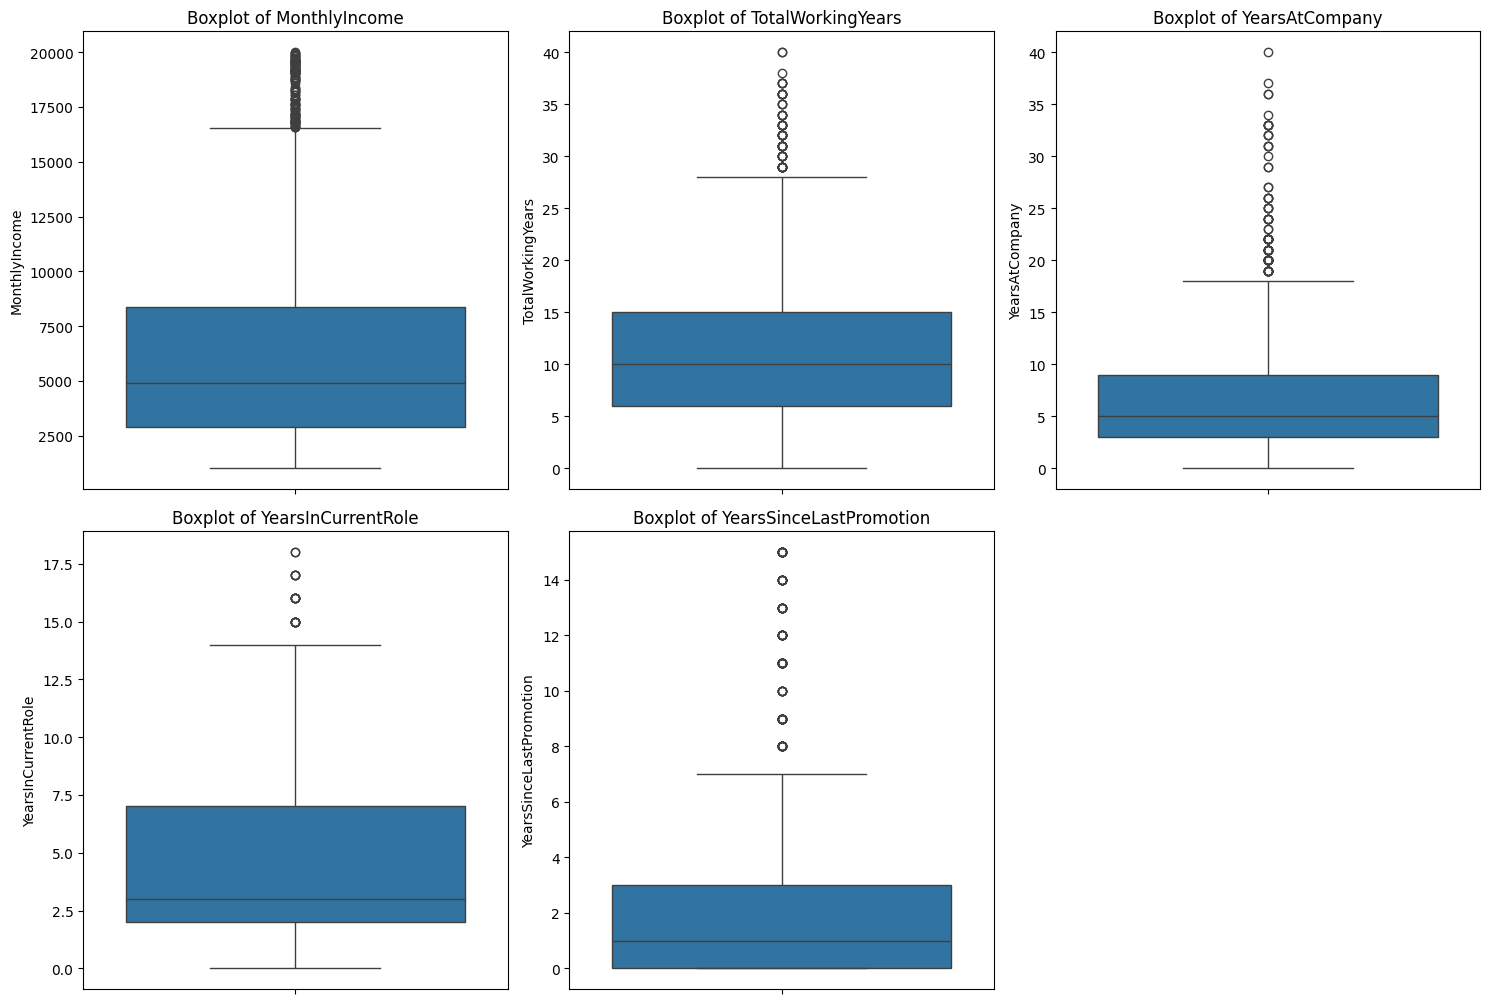

In [426]:
import math
columns=['MonthlyIncome', 'TotalWorkingYears' ,'YearsAtCompany' ,'YearsInCurrentRole','YearsSinceLastPromotion']
n_cols = 3  # عدد الرسومات في كل صف
n_rows = math.ceil(len(df[columns]) / n_cols)  # نحسب عدد الصفوف تلقائياً

plt.figure(figsize=(15, 5 * n_rows))

for i, col in enumerate(columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

5.2. Handling the outliers:

In [427]:
# show the number of outliers for each columns
def detect_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # تعديل القيم بدلًا من حذفها
    data[col] = data[col].apply(
        lambda x: upper if x > upper else (lower if x < lower else x)
    )


for col in columns:
    detect_outliers(df, col)

5.3. BoxPlot after handling data

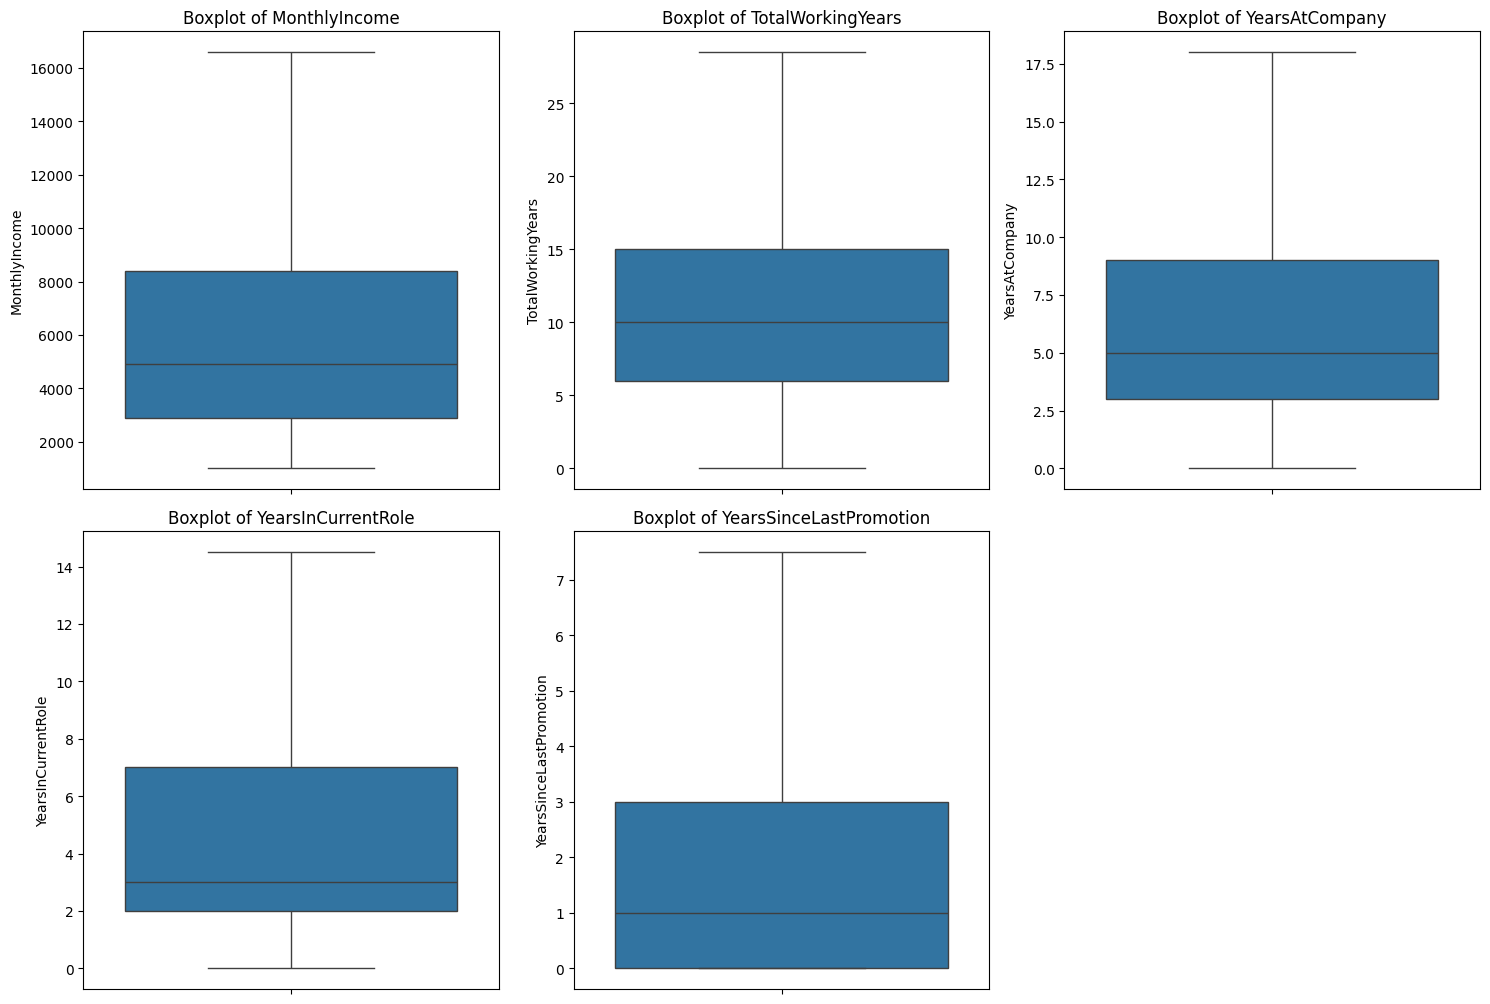

In [428]:
n_cols = 3  # عدد الرسومات في كل صف
n_rows = math.ceil(len(df[columns]) / n_cols)  # نحسب عدد الصفوف تلقائياً

plt.figure(figsize=(15, 5 * n_rows))

for i, col in enumerate(columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

# 6. Skewness handling

In [429]:
df.skew()

Age                                   0.413286
JobLevel                              1.025401
JobInvolvement                       -0.498419
JobSatisfaction                      -0.329672
MonthlyIncome                         1.168595
TotalWorkingYears                     0.855518
YearsAtCompany                        0.900774
YearsInCurrentRole                    0.803704
YearsSinceLastPromotion               1.262563
YearsWithCurrManager                  0.833451
DistanceFromHome                      0.958118
Education                            -0.289681
EnvironmentSatisfaction              -0.321654
RelationshipSatisfaction             -0.302828
WorkLifeBalance                      -0.552480
NumCompaniesWorked                    1.026471
PercentSalaryHike                     0.821128
PerformanceRating                     1.921883
StockOptionLevel                      0.968980
TrainingTimesLastYear                 0.553124
Attrition                             1.844366
Gender_Female

In [430]:

columns=['JobLevel', 'MonthlyIncome', 'YearsSinceLastPromotion']
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')  # يدعم القيم السالبة والصفر

df[columns] = pt.fit_transform(df[columns])


In [431]:
df.skew()

Age                                   0.413286
JobLevel                              0.103624
JobInvolvement                       -0.498419
JobSatisfaction                      -0.329672
MonthlyIncome                         0.027515
TotalWorkingYears                     0.855518
YearsAtCompany                        0.900774
YearsInCurrentRole                    0.803704
YearsSinceLastPromotion               0.187060
YearsWithCurrManager                  0.833451
DistanceFromHome                      0.958118
Education                            -0.289681
EnvironmentSatisfaction              -0.321654
RelationshipSatisfaction             -0.302828
WorkLifeBalance                      -0.552480
NumCompaniesWorked                    1.026471
PercentSalaryHike                     0.821128
PerformanceRating                     1.921883
StockOptionLevel                      0.968980
TrainingTimesLastYear                 0.553124
Attrition                             1.844366
Gender_Female

In [432]:
df.to_csv("dataCleaned.csv")